In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [ ]:
from google.colab import files
uploaded = files.upload()

# Get the file name from the uploaded files
uploaded_file_name = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
df = pd.read_csv(uploaded_file_name)

Saving labeled_tweets.csv to labeled_tweets (2).csv


### **Exploratory Data Analysis(EDA)**

In [ ]:
print(df.head())

   Unnamed: 0  position                                              title  \
0           0         0                          Elon Musk (@elonmusk) / X   
1           1         1                                          Elon Musk   
2           2         2                                          Elon Musk   
3           3         3     Elon Musk - SpaceX Falcon rocket just launched   
4           4         4  Elon Musk on X: "I will resign as CEO as soon ...   

                                             snippet        highlighs  \
0  Elon Musk's posts ; 25K. 58K ; What say you, b...  ["Elon Musk's"]   
1  Conversation. Elon Musk · @elonmusk. You have ...    ['Elon Musk']   
2  Elon Musk. @elonmusk. This past week, there we...    ['Elon Musk']   
3  Log in · Sign up. Conversation. Elon Musk · @e...    ['Elon Musk']   
4  Elon Musk. @elonmusk. I will resign as CEO as ...    ['Elon Musk']   

                                                link  \
0                       https://twit

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      27 non-null     int64 
 1   position        27 non-null     int64 
 2   title           27 non-null     object
 3   snippet         27 non-null     object
 4   highlighs       27 non-null     object
 5   link            27 non-null     object
 6   displayed_link  27 non-null     object
 7   sentiment       27 non-null     object
 8   processed_text  27 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.0+ KB
None


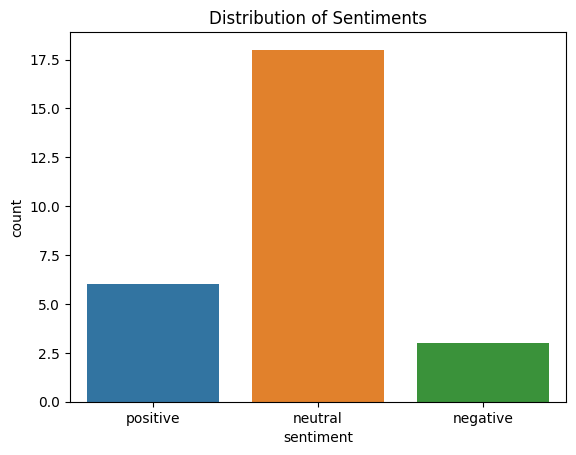

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

In [ ]:
# Calculate sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

# Define data for the funnel chart
labels = sentiment_counts.index
values = sentiment_counts.values

# Map sentiment labels to corresponding colors
colors = {'positive': 'green', 'neutral': 'grey', 'negative': 'red'}

# Create a funnel chart
fig = go.Figure(go.Funnel(
    y=labels,
    x=values,
    textinfo="value+percent initial",
    marker=dict(color=[colors[sentiment] for sentiment in labels])
))

# Update layout for better visualization
fig.update_layout(
    title="Sentiment Distribution Funnel Chart",
    margin=dict(l=20, r=20, t=40, b=20),
    paper_bgcolor="lightgray",
)

# Show the funnel chart
fig.show()


In [ ]:
# Preprocessing Function
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove the '#' symbol
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove hyperlinks
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-words
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['snippet'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X = tfidf_vectorizer.fit_transform(df['processed_text'])
y = df['sentiment']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Model Building and Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.title('Confusion Matrix')
    plt.show()

Naive Bayes Model
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
     neutral       1.00      1.00      1.00         5
    positive       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



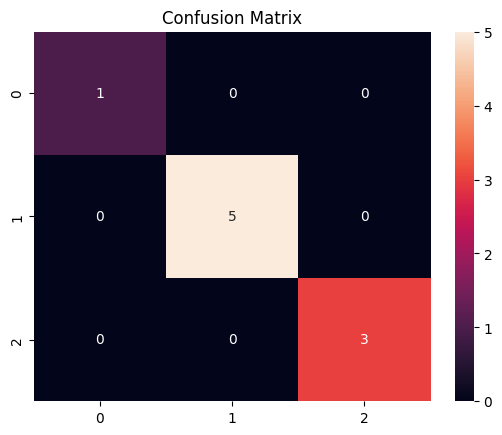

Logistic Regression Model
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
     neutral       0.71      1.00      0.83         5
    positive       1.00      0.33      0.50         3

    accuracy                           0.78         9
   macro avg       0.90      0.78      0.78         9
weighted avg       0.84      0.78      0.74         9



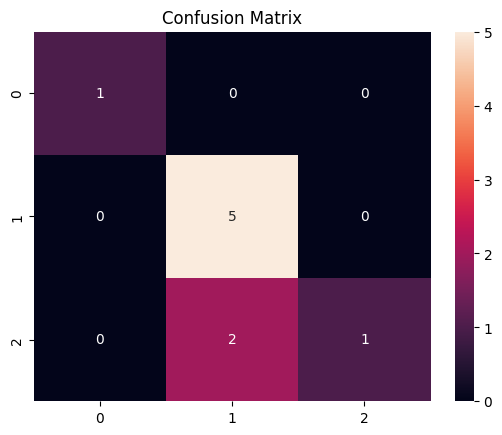

In [ ]:
# Naive Bayes Model
print("Naive Bayes Model")
nb_model = MultinomialNB()
evaluate_model(nb_model, X_train, X_test, y_train, y_test)

# Logistic Regression Model
print("Logistic Regression Model")
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, X_train, X_test, y_train, y_test)

In [ ]:
# Function to predict sentiment for a given tweet from the dataset
def predict_sentiment_from_dataset(model, df, index):
    # Fetch the tweet from the dataset using the provided index
    tweet = df.loc[index, 'snippet']

    # Predict sentiment for the fetched tweet
    prediction = predict_sentiment(model, tweet)

    return prediction

# Example of predicting sentiment for a tweet in the dataset
sample_index = 0  # Change this to the desired index
predicted_sentiment_nb = predict_sentiment_from_dataset(nb_model, df, sample_index)
predicted_sentiment_lr = predict_sentiment_from_dataset(lr_model, df, sample_index)

print(f"Tweet at index {sample_index}: {df.loc[sample_index, 'snippet']}")
print(f"Predicted Sentiment (Naive Bayes): {predicted_sentiment_nb}")
print(f"Predicted Sentiment (Logistic Regression): {predicted_sentiment_lr}")


Tweet at index 0: Elon Musk's posts ; 25K. 58K ; What say you, big brands? · 3K. 2K ; Amazing lmaooo · 2K. 1K ; SpaceX Falcon rocket just launched · 2K. 1K ; And another. @CommunityNotes.
Predicted Sentiment (Naive Bayes): positive
Predicted Sentiment (Logistic Regression): neutral
